<a href="https://colab.research.google.com/github/fpseverino/progetto-ml-ai/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [49]:
num_task = 11
df = pd.read_csv("Task_{}.csv".format(num_task))
df.shape

(145, 134)

In [50]:
num_sample = df.shape[0]

# Rimuove righe con label uguale a -1
df = df[df["Label"] != -1]
print("Sample eliminati:", num_sample - df.shape[0])

Sample eliminati: 26


In [51]:
# Controlla se ci sono righe duplicate
sample_duplicati = df.duplicated().sum()
if sample_duplicati > 0:
  print("Sample duplicati:", sample_duplicati)

In [52]:
# Controlla se ci sono valori null
valori_null = df.isnull().sum().sum()
if valori_null > 0:
  print("Valori null:", valori_null)

In [53]:
# Controlla se ci sono valori NaN
valori_nan = df.isna().sum().sum()
if valori_nan > 0:
  print("Valori NaN:", valori_nan)

In [54]:
# Controlla tipi di dato delle colonne
print(df.dtypes)
print("-------------------------------------------")
df.dtypes.value_counts(dropna = False)

Id                                    int64
mean:velocity:axis-x(in-air)        float64
std:velocity:axis-x(in-air)         float64
iqr:velocity:axis-x(in-air)         float64
mean:velocity:axis-x(on-surface)    float64
                                     ...   
Gender                               object
Age                                 float64
Dominant_Hand                        object
Label                                 int64
Task                                  int64
Length: 134, dtype: object
-------------------------------------------


float64    129
int64        3
object       2
Name: count, dtype: int64

In [55]:
# La feature Age non ha ne valori pari a 0 ne outlier
df["Age"].value_counts(dropna = False)

Age
6.0    92
7.0    23
9.0     3
8.0     1
Name: count, dtype: int64

In [56]:
# Seleziona le feature numeriche (meno Label e Age)
colonne_numeriche = df.select_dtypes(include=[np.number]).columns
colonne_numeriche = colonne_numeriche.drop("Label")
colonne_numeriche = colonne_numeriche.drop("Age") # La feature Age non ha ne valori pari a 0 ne outlier
colonne_numeriche = colonne_numeriche.drop("Id")
colonne_numeriche = colonne_numeriche.drop("Task")

In [57]:
# Sostituisce tutti i valori numerici pari a 0 con la media della Label

# Per ogni feature numerica
for colonna in colonne_numeriche:
    # calcola la media per ogni Label, escludendo i valori 0
    valori_medi = df[df[colonna] != 0].groupby("Label")[colonna].mean()

    # Per ogni 'Label' nel DataFrame
    for label in df["Label"].unique():
        # se la Label esiste in valori_medi
        if label in valori_medi.index:
            # sostituisci i valori 0 con la media corrispondente per quella Label
            df.loc[(df["Label"] == label) & (df[colonna] == 0), colonna] = valori_medi[label]

In [58]:
df.describe()

,Id,mean:velocity:axis-x(in-air),std:velocity:axis-x(in-air),iqr:velocity:axis-x(in-air),mean:velocity:axis-x(on-surface),std:velocity:axis-x(on-surface),iqr:velocity:axis-x(on-surface),mean:velocity:axis-y(in-air),std:velocity:axis-y(in-air),iqr:velocity:axis-y(in-air),...,std:ratio_of_stroke_durations,iqr:ratio_of_stroke_durations,writing_duration(on-surface),writing_duration_overall,ratio_of_writing_durations,number_of_interruptions,number_of_interruptions_relative,Age,Label,Task
count,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.0
mean,74.134454,1.368948,8.193196,2.000000e+00,0.883329,1.169999,2.061224,1.215830,5.169886,2.046218,...,2.936537,2.838637,18.845462,20.582521,25.377887,11.040816,0.376555,6.285714,0.966387,11.0
std,42.996437,0.922895,7.891457,3.043957e-13,0.448563,0.356775,0.316622,0.478721,2.650390,0.186307,...,1.456270,1.648858,9.087171,11.386411,34.523470,7.504059,0.205817,0.612620,0.735686,0.0
min,1.000000,0.108108,0.452249,2.000000e+00,0.202848,0.603779,2.000000,0.153846,0.532939,2.000000,...,0.414918,0.414918,6.280000,6.285000,1.265012,2.000000,0.052301,6.000000,0.000000,11.0
25%,35.500000,1.181843,5.813638,2.000000e+00,0.598651,0.942267,2.000000,1.096593,4.980676,2.000000,...,2.574561,2.379897,12.667500,12.782500,13.796591,7.428571,0.263346,6.000000,0.000000,11.0
50%,79.000000,1.431453,7.981108,2.000000e+00,0.769275,1.054809,2.000000,1.164372,5.194738,2.000000,...,2.574561,2.379897,17.530000,18.065000,26.049698,11.909091,0.394176,6.000000,1.000000,11.0
75%,111.500000,1.436557,7.981108,2.000000e+00,1.020034,1.295604,2.000000,1.325316,5.257729,2.100000,...,3.308811,3.370755,23.325000,25.092500,28.525843,12.823529,0.447941,6.000000,1.500000,11.0
max,145.000000,7.929825,71.946827,2.000000e+00,3.315033,2.357503,4.000000,3.661765,17.890419,4.000000,...,11.599035,11.599035,63.200000,78.190000,295.153846,50.000000,1.200720,9.000000,2.000000,11.0


<Axes: >

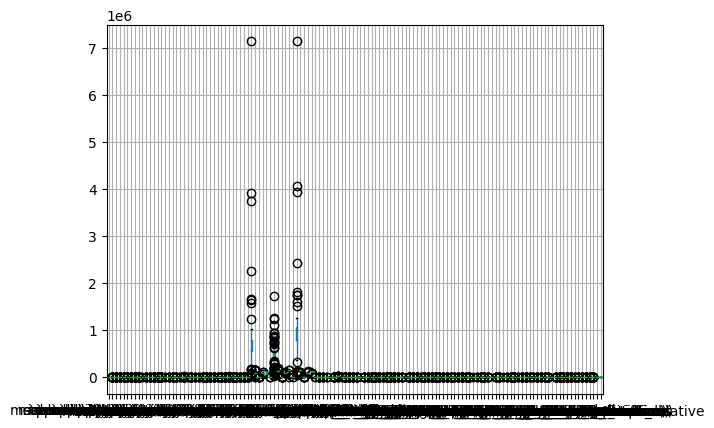

In [59]:
df.boxplot()

In [60]:
# Sostituisce gli outlier con la media della Label

# Per ogni feature numerica
for colonna in colonne_numeriche:
    # Calcola i percentili per ciascuna feature numerica
    q_low = df[colonna].quantile(0.01)
    q_high = df[colonna].quantile(0.99)

    # Calcola la media per ogni Label, escludendo gli outlier
    valori_medi = df[(df[colonna] > q_low) & (df[colonna] < q_high)].groupby("Label")[colonna].mean()

    # Definisci una funzione per sostituire i valori outlier con la media corrispondente
    def sostituisci_outlier(riga):
        label = riga["Label"]
        valore = riga[colonna]
        if label in valori_medi.index and (valore <= q_low or valore >= q_high):
            return valori_medi[label]
        else:
            return valore

    # Applica la funzione a tutte le righe
    df[colonna] = df.apply(sostituisci_outlier, axis=1)

In [61]:
df.describe()

,Id,mean:velocity:axis-x(in-air),std:velocity:axis-x(in-air),iqr:velocity:axis-x(in-air),mean:velocity:axis-x(on-surface),std:velocity:axis-x(on-surface),iqr:velocity:axis-x(on-surface),mean:velocity:axis-y(in-air),std:velocity:axis-y(in-air),iqr:velocity:axis-y(in-air),...,std:ratio_of_stroke_durations,iqr:ratio_of_stroke_durations,writing_duration(on-surface),writing_duration_overall,ratio_of_writing_durations,number_of_interruptions,number_of_interruptions_relative,Age,Label,Task
count,119.000000,119.000000,119.000000,1.190000e+02,119.000000,119.000000,119.000000,119.000000,119.000000,1.190000e+02,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.0
mean,74.134454,1.286897,7.502483,2.000000e+00,0.864884,1.160837,2.029337,1.199474,5.041294,2.000000e+00,...,2.855599,2.742884,18.427445,19.974920,21.539787,11.176403,0.369916,6.285714,0.966387,11.0
std,42.996437,0.453705,4.257379,1.594775e-13,0.365082,0.315011,0.188531,0.366959,2.101403,1.744034e-13,...,1.037243,1.206446,7.556642,9.140007,12.406774,4.308888,0.174932,0.612620,0.735686,0.0
min,1.000000,0.307692,0.721602,2.000000e+00,0.321911,0.734980,2.000000,0.231214,0.639506,2.000000e+00,...,0.619121,0.483666,7.170000,7.175000,1.939336,4.000000,0.069577,6.000000,0.000000,11.0
25%,35.500000,1.199125,6.313704,2.000000e+00,0.611366,0.948857,2.000000,1.096593,4.980676,2.000000e+00,...,2.574561,2.379897,12.890000,12.950000,14.638743,8.000000,0.263346,6.000000,0.000000,11.0
50%,79.000000,1.431453,7.981108,2.000000e+00,0.781303,1.057160,2.000000,1.200974,5.194738,2.000000e+00,...,2.613712,2.415536,17.765000,18.580000,23.588287,11.909091,0.394176,6.000000,1.000000,11.0
75%,111.500000,1.431453,7.981108,2.000000e+00,1.009417,1.269385,2.000000,1.325316,5.257729,2.000000e+00,...,3.308811,3.370531,23.012500,24.827500,28.525843,12.296296,0.447941,6.000000,1.500000,11.0
max,145.000000,4.562162,37.620116,2.000000e+00,1.980892,2.235227,4.000000,2.736508,12.989940,2.000000e+00,...,7.121271,10.365163,43.335000,56.720000,85.270270,30.000000,1.042685,9.000000,2.000000,11.0


<Axes: >

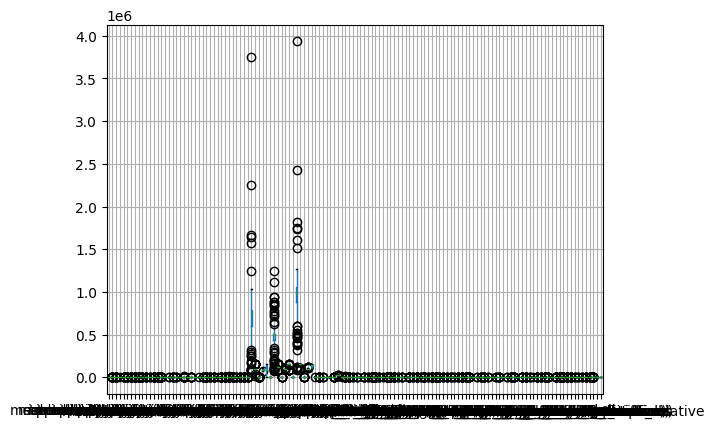

In [62]:
df.boxplot() # Gli outlier sono diminuiti di un ordine di grandezza

In [63]:
# Controllare valori della colonna Gender
print(df["Gender"].value_counts())

# Sostituire le stringhe con valori numerici
df["Gender"] = df.Gender.apply(lambda x: x.replace("Femminile", "0"))
df["Gender"] = df.Gender.apply(lambda x: x.replace("Maschile", "1"))

# Controllare se i valori della colonna Gender sono stati sostituiti correttamente
print("-------------------------")
print(df["Gender"].value_counts())

# I valori rimangono di tipo "object" (stringhe)
print("-------------------------")
print(df.dtypes.value_counts(dropna = False))

Gender
Femminile    64
Maschile     55
Name: count, dtype: int64
-------------------------
Gender
0    64
1    55
Name: count, dtype: int64
-------------------------
float64    129
int64        3
object       2
Name: count, dtype: int64


In [64]:
# Controllare valori della colonna Dominant_Hand
print(df["Dominant_Hand"].value_counts())

# Sostituire le stringhe con valori numerici
df["Dominant_Hand"] = df.Dominant_Hand.apply(lambda x: x.replace("Destra", "0"))
df["Dominant_Hand"] = df.Dominant_Hand.apply(lambda x: x.replace("Sinistra", "1"))

# Controllare se i valori della colonna Dominant_Hand sono stati sostituiti correttamente
print("-------------------------")
print(df["Dominant_Hand"].value_counts())

# I valori rimangono di tipo "object" (stringhe)
print("-------------------------")
print(df.dtypes.value_counts(dropna = False))

Dominant_Hand
Destra      106
Sinistra     13
Name: count, dtype: int64
-------------------------
Dominant_Hand
0    106
1     13
Name: count, dtype: int64
-------------------------
float64    129
int64        3
object       2
Name: count, dtype: int64


In [65]:
# Controlla se ci sono valori NaN
valori_nan = df.isna().sum().sum()
if valori_nan > 0:
  print("Valori NaN:", valori_nan)

In [66]:
# Controlla se ci sono valori null
valori_null = df.isnull().sum().sum()
if valori_null > 0:
  print("Valori null:", valori_null)

In [67]:
# Controlla se ci sono righe duplicate
sample_duplicati = df.duplicated().sum()
if sample_duplicati > 0:
  print("Sample duplicati:", sample_duplicati)

In [68]:
df

,Id,mean:velocity:axis-x(in-air),std:velocity:axis-x(in-air),iqr:velocity:axis-x(in-air),mean:velocity:axis-x(on-surface),std:velocity:axis-x(on-surface),iqr:velocity:axis-x(on-surface),mean:velocity:axis-y(in-air),std:velocity:axis-y(in-air),iqr:velocity:axis-y(in-air),...,writing_duration(on-surface),writing_duration_overall,ratio_of_writing_durations,number_of_interruptions,number_of_interruptions_relative,Gender,Age,Dominant_Hand,Label,Task
0,1,0.941176,1.939393,2.0,0.539890,0.889698,2.0,1.272266,12.989940,2.0,...,24.505,25.200,36.036765,11.936170,0.079365,0,6.0,0,1,11
1,2,0.554197,1.699309,2.0,0.492917,0.866389,2.0,0.942135,5.561459,2.0,...,25.765,31.975,4.199674,14.000000,0.437842,1,6.0,0,1,11
2,3,1.431453,7.981108,2.0,0.755661,1.020492,2.0,1.325316,5.257729,2.0,...,18.990,18.995,28.525843,11.909091,0.394176,0,6.0,0,1,11
3,4,1.191803,4.646091,2.0,0.738685,1.017430,2.0,1.022951,4.012619,2.0,...,18.560,24.765,3.042623,20.000000,0.807591,1,6.0,1,0,11
4,5,1.203679,7.271267,2.0,0.825959,1.008418,2.0,1.096593,5.194738,2.0,...,15.255,15.260,26.049698,12.823529,0.447941,1,6.0,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,141,0.535714,0.901671,2.0,0.726223,1.065904,2.0,0.828571,1.158465,2.0,...,18.190,19.615,12.992857,4.000000,0.203926,0,6.0,0,2,11
141,142,1.203679,7.271267,2.0,0.806359,1.051167,2.0,1.125161,5.336005,2.0,...,15.725,15.805,20.078176,12.296296,0.126542,1,6.0,0,0,11
142,143,1.203679,7.271267,2.0,1.742432,2.171070,2.0,1.096593,5.194738,2.0,...,9.745,9.750,26.049698,12.823529,0.447941,1,6.0,0,0,11
143,144,1.441662,9.626876,2.0,0.905213,1.052363,2.0,1.150242,4.980676,2.0,...,14.770,14.775,18.845249,7.428571,0.263346,1,7.0,0,2,11


In [69]:
df.to_csv("Task_{}_clean.csv".format(num_task), index=False)